In [2]:
import numpy as np
import matplotlib.pyplot as plt

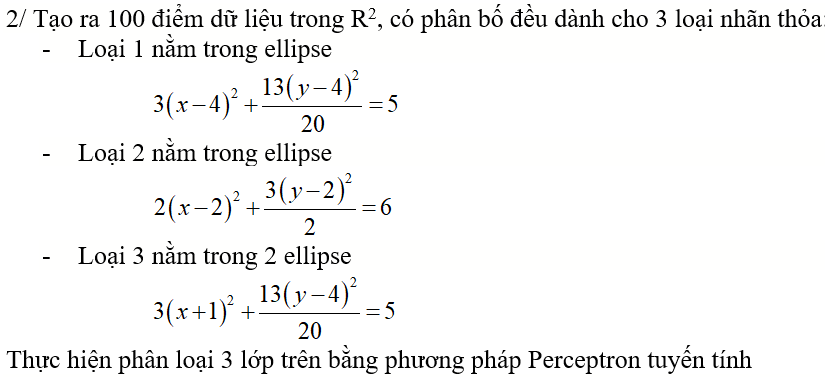

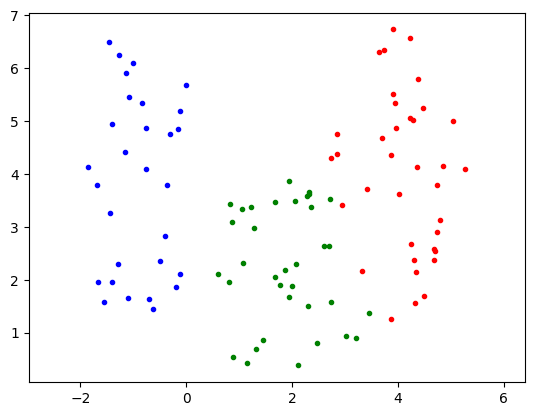

In [3]:
plt.figure()
plt.axis('equal')

points =[]
labels = []

i = 0
while i < 100:
    x = np.random.random(1)*10-2
    y = np.random.random(1)*10-2

    #Loại 1
    if 3*(x-4)**2 + 13/20*(y-4)**2 < 5: 
        points.append([x,y])
        labels.append(0)
        i+=1
        plt.plot(x,y, 'r.')

    #Loại 2
    elif 2*(x-2)**2 + 3/2*(y-2)**2 <6:
        points.append([x,y])
        labels.append(1)
        i+=1
        plt.plot(x,y, 'g.')

    #Loại 3
    elif 3*(x+1)**2 + 13/20*(y-4)**2 <5:
        points.append([x,y])
        labels.append(2)
        i+=1
        plt.plot(x,y, 'b.')
    else: continue
    

In [4]:
points = np.array(points).squeeze()  # Loại bỏ các chiều có kích thước bằng 1
labels = np.array(labels)

W = np.array([[0,-1,0], 
              [1, 1, 0], 
              [0, 1,0]], dtype=float) 
              
def perceptron_multi(X,W):
    X=np.array([X])
    X=X.T
    xx = np.vstack((X, np.array([[1]]))) # thêm số 1 vào cột cuối hay còn gọi là bias để đường tuyến tính xa rời gốc toạ độ
    y=W @ xx  
    return y

epoch = 10
count = 0
for _ in range(epoch):
    for i in np.arange(points.shape[0]):
        out = perceptron_multi(points[i],W) # Tính toán đầu ra
        xx = np.vstack((np.array([points[i]]).T, np.array([[1]]))) # thêm số 1 vào cột cuối
        flag = 'D'

        if np.argmax(out) != labels[i]:
            flag = 'S'
            W[labels[i]] = W[labels[i]]+ xx.T

            for k in range(W.shape[0]) :
                if np.isclose(out[k], max(out)) and k != labels[i]:
                    W[k] =W[k]- xx.T

        print(W[0], W[1], W[2], '[X', i+1, 'L', labels[i]+1,']', xx.T[0], out.T, flag)

        if flag =='D': count = count +1
        else: count = 0
        if count == 100: break
    if count == 100: break

[3.86968166 3.36245105 1.        ] [-2.86968166 -3.36245105 -1.        ] [0. 1. 0.] [X 1 L 1 ] [3.86968166 4.36245105 1.        ] [[-4.36245105  8.23213271  4.36245105]] S
[3.86968166 3.36245105 1.        ] [-2.86968166 -3.36245105 -1.        ] [0. 1. 0.] [X 2 L 1 ] [4.33015778 1.56667133 1.        ] [[ 23.0241878  -18.69403002   1.56667133]] D
[1.86621321 1.46941336 0.        ] [-0.86621321 -1.46941336  0.        ] [0. 1. 0.] [X 3 L 2 ] [2.00346845 1.89303769 1.        ] [[ 15.11803169 -13.11456324   1.89303769]] S
[1.86621321 1.46941336 0.        ] [-0.86621321 -1.46941336  0.        ] [0. 1. 0.] [X 4 L 1 ] [2.93815956 3.41221517 1.        ] [[10.49718674 -7.55902718  3.41221517]] D
[-0.87234239 -0.10848639 -1.        ] [1.87234239 0.10848639 1.        ] [0. 1. 0.] [X 5 L 2 ] [2.7385556  1.57789975 1.        ] [[ 7.4293156  -4.69076     1.57789975]] S
[2.55398104 3.60826134 0.        ] [-1.55398104 -3.60826134  0.        ] [0. 1. 0.] [X 6 L 1 ] [3.42632343 3.71674773 1.        ] [[-4

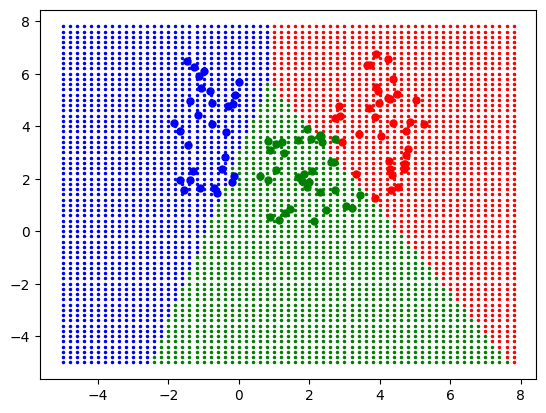

In [5]:
# VẼ ĐỒ THỊ PHÂN LOẠI 2D
color = 'rgb'
plt.figure()

for x1 in np.arange(-5, 8, 0.2):
    for x2 in np.arange(-5,8, 0.2):
        x = np.array([x1, x2])
        out = perceptron_multi(x, W)  # Tính toán đầu ra
        label = np.argmax(out)  # Nhãn dự đoán
        plt.plot(x1,x2,color[label]+'.',markersize=3)  # Vẽ điểm dự đoán

for i in range(points.shape[0]):
    plt.plot(points[i,0], points[i,1], color[labels[i]]+'.',markersize = 10) # Vẽ các điểm huấn luyện


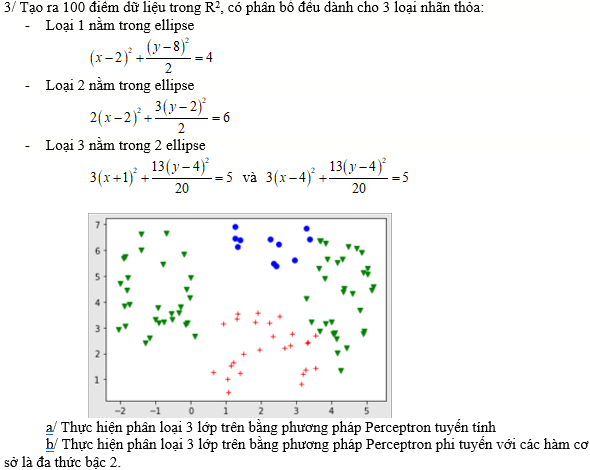

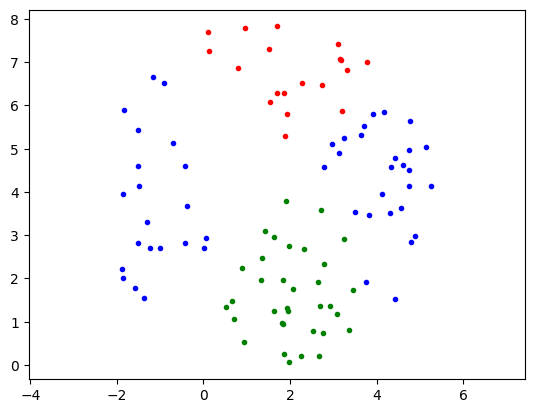

In [6]:
#TẠO RA 100 ĐIỂM DỮ LIỆU TRONG KHÔNG GIAN 2D, CÓ PHÂN BỔ ĐỀU DÀNH CHO 3 LOẠI NHÃN

plt.figure()
plt.axis('equal')

points_3 =[]
labels_3 = []

i = 0
while i < 100 :
    x = np.random.random(1)*10-2
    y = np.random.random(1)*10-2

    #Loại 1
    if (x-2)**2 + 0.5*(y-8)**2 < 4: 
        points_3.append([x,y])
        labels_3.append(0)
        i+=1
        plt.plot(x,y, 'r.')

    #Loại 2
    elif 2*(x-2)**2 + 3/2*(y-2)**2 <6:
        points_3.append([x,y])
        labels_3.append(1)
        i+=1
        plt.plot(x,y, 'g.')

    #Loại 3
    elif 3*(x+1)**2 + 13/20*(y-4)**2 <5 or 3*(x-4)**2 + 13/20*(y-4)**2 < 5:
        points_3.append([x,y])
        labels_3.append(2)
        i+=1
        plt.plot(x,y, 'b.')

    else: continue

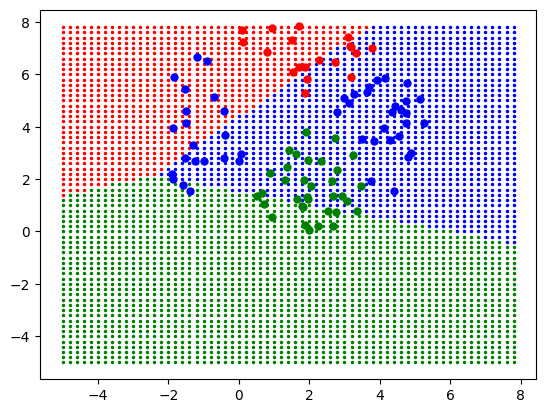

In [7]:
#CÂU A: PHÂN LOẠI 3 LỚP BẰNG PHƯƠNG PHÁP PERCEPTRON TUYẾN TÍNH

points_A = np.array(points_3).squeeze()  # Loại bỏ các chiều có kích thước bằng 1
labels_A = np.array(labels_3)

W = np.array([[0,-1,0], 
              [1, 1, 0], 
              [0, 1,0]], dtype=float) 
              
def perceptron_multi(X,W):
    X=np.array([X])
    X=X.T
    xx = np.vstack((X, np.array([[1]]))) # thêm số 1 vào cột cuối hay còn gọi là bias để đường tuyến tính xa rời gốc toạ độ
    y=W @ xx  
    return y

epoch = 10
count = 0
for _ in range(epoch):
    for i in np.arange(points_A.shape[0]):
        out = perceptron_multi(points_A[i],W) # Tính toán đầu ra
        xx = np.vstack((np.array([points_A[i]]).T, np.array([[1]]))) # thêm số 1 vào cột cuối
        flag = 'D'

        if np.argmax(out) != labels_A[i]:
            flag = 'S'
            W[labels_A[i]] = W[labels_A[i]]+ xx.T

            for k in range(W.shape[0]) :
                if np.isclose(out[k], max(out)) and k != labels_A[i]:
                    W[k] =W[k]- xx.T

        #print(W[0], W[1], W[2], '[X', i+1, 'L', labels_3[i]+1,']', xx.T[0], out.T, flag)

        if flag =='D': count = count +1
        else: count = 0
        if count == 100: break
    if count == 100: break

# VẼ ĐỒ THỊ PHÂN LOẠI 2D
color = 'rgb'
plt.figure()

for x1 in np.arange(-5, 8, 0.2):
    for x2 in np.arange(-5,8, 0.2):
        x = np.array([x1, x2])
        out = perceptron_multi(x, W)  # Tính toán đầu ra
        label = np.argmax(out)  # Nhãn dự đoán
        plt.plot(x1,x2,color[label]+'.',markersize=3)  # Vẽ điểm dự đoán

for i in range(points.shape[0]):
    plt.plot(points_A[i,0], points_A[i,1], color[labels_A[i]]+'.',markersize = 10) # Vẽ các điểm huấn luyện

### => ĐỘ CHÍNH XÁC TỪ PHÂN LOẠI BẰNG PHƯƠNG PHÁP PERCEPTRON TUYẾN TÍNH QUÁ THẤP

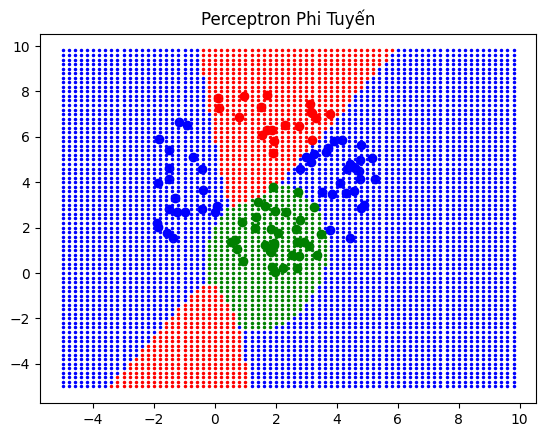

In [8]:
#CÂU B: PHÂN LOẠI 3 LỚP BẰNG PHƯƠNG PHÁP PERCEPTRON TUYẾN TÍNH VỚI CÁC HÀM CƠ SỞ LÀ ĐA THỨC BẬC 2

# Hàm perceptron phi tuyến
def perceptron_phituyen(x, w):
    # Thêm các kernel phi tuyến vào input
    xx = np.array([x[0], x[1], x[0]**2, x[1]**2, x[0]*x[1], 1])  # Thêm bias
    y = w @ xx  
    return y

# Dữ liệu huấn luyện
points_B = np.array(points_3).squeeze()  # Loại bỏ các chiều có kích thước bằng 1
labels_B = np.array(labels_3) # Nhãn
W = np.random.random((3, 6)) - 0.5  # Trọng số ngẫu nhiên với kích thước phù hợp (3 lớp, 5 kernel + bias)

color = 'rgb'

# Huấn luyện perceptron phi tuyến
epoch = 100
count = 0
for _ in range(epoch):
    for i in range(points_B.shape[0]):
        out = perceptron_phituyen(points_B[i], W)  # Tính toán đầu ra
        xx = np.array([points_B[i, 0], points_B[i, 1], points_B[i, 0]**2, points_B[i, 1]**2, points_B[i, 0]*points_B[i, 1], 1])  # Thêm kernel và bias
        flag = 'D'

        if np.argmax(out) != labels_B[i]:  # Nếu dự đoán sai
            flag = 'S'
            W[labels_B[i]] = W[labels_B[i]] + xx  # Cập nhật trọng số cho lớp đúng
            for k in range(W.shape[0]):
                if k != labels_B[i] and out[k] == max(out):  # Giảm trọng số cho lớp sai
                    W[k] = W[k] - xx

        #print(W[0], W[1], W[2], '[X', i+1, 'L', t[i]+1, ']', xx, out, flag)

        if flag == 'D':
            count += 1
        else:
            count = 0
        if count == 100:
            break
    if count == 100:
        break

# Vẽ đồ thị phân loại 2D
plt.figure()
for x1 in np.arange(-5, 10, 0.2):
    for x2 in np.arange(-5, 10, 0.2):
        x = np.array([x1, x2])
        out = perceptron_phituyen(x, W)  # Tính toán đầu ra
        label = np.argmax(out)  # Nhãn dự đoán
        plt.plot(x1, x2, color[label] + '.', markersize=3)  # Vẽ điểm dự đoán

# Vẽ các điểm huấn luyện
for i in range(points_B.shape[0]):
    plt.plot(points_B[i, 0], points_B[i, 1], color[labels_B[i]] + 'o', markersize=6)  # Vẽ các điểm huấn luyện

plt.title('Perceptron Phi Tuyến')
plt.show()